In [15]:
from bs4 import BeautifulSoup
import requests
import pandas as pd
import csv
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

In [16]:
url = "https://bb10k.bolderboulder.com/bolder-on-the-run-overall-results/"
page = requests.get(url)
html = page.text

tree = BeautifulSoup(html,"lxml")
table_tag = tree.select("table")[0]
tab_data = np.array([[item.text for item in row_data.select("th, td")]
                for row_data in table_tag.select("tr")])

<BarContainer object of 95 artists>

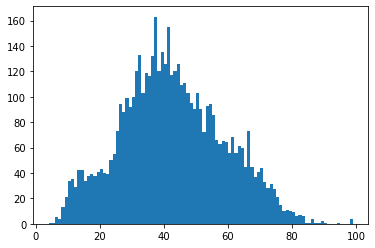

In [17]:
ages = tab_data[1:-1, 6]
ages = ages.astype(int)
histo, bin_edges = np.histogram(ages, bins=95, range=(4,99))
plt.bar(bin_edges[:-1], histo, width=1, align='edge')

In [18]:
def timeToMins(timeStr):
    hms = timeStr.split(':')
    hms = np.array(hms)
    hms = hms.astype(int)
    mins = np.sum(hms * np.array([60, 1, 1/60]))
    return mins

<BarContainer object of 300 artists>

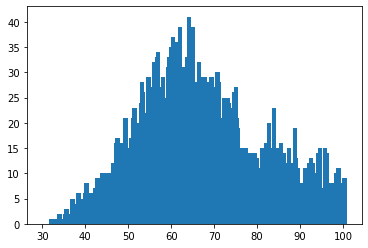

In [19]:
times = tab_data[1:-1, -1].astype(str)
for i in range(len(times)):
    times[i] = timeToMins(times[i])
times = times.astype(float)
# print(np.amax(times))
histo, bin_edges = np.histogram(times, bins=300, range=(30, 100))
plt.bar(bin_edges[:-1], histo, width=1, align='edge')

In [20]:
def model_func(x, m, b):
    return m*x + b

m = 0.247 +/- 0.021 mins/year
b = 64.695 +/- 0.959 mins
R = 1.1387245228864405e-06 unitless units


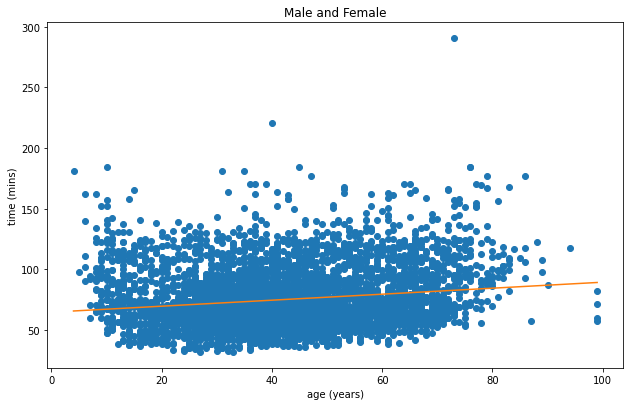

In [23]:
fig = plt.figure(figsize=(10,6))
axes = fig.add_axes([0.1, 0.1, 0.8, 0.8])

axes.plot(ages, times, 'o')
p_optimized, covariance = curve_fit(model_func, ages, times, (0, 50))
x = np.linspace(4, 99, 1000)
plt.plot(x, model_func(x, *p_optimized), '-')
axes.set_xlabel('age (years)')
axes.set_ylabel('time (mins)')
axes.set_title('Male and Female')
fit_m = p_optimized[0]
uncertainty = np.sqrt(covariance[0][0])
R = covariance[0][0] / (np.std(ages, ddof=1) * np.std(times, ddof=1))

fit_b = p_optimized[1]
uncertainty_b = np.sqrt(covariance[1][1])

print('m = {:.3f} +/- {:.3f} mins/year'.format(fit_m, uncertainty))
print('b = {:.3f} +/- {:.3f} mins'.format(fit_b, uncertainty_b))
print('R = {} unitless units'.format(R))

In [22]:
gender = tab_data[1:-1, 5]
bool_array = gender == 'M'
ind = np.where(bool_array)[0]
maleAges = ages[ind]
maleTimes = times[ind]

bool_array = gender == 'F'
ind = np.where(bool_array)[0]
femaleAges = ages[ind]
femaleTimes = times[ind]

m = 0.202 +/- 0.028 mins/year
b = 61.355 +/- 1.312 mins
R = 1.9457722173435498e-06 unitless units


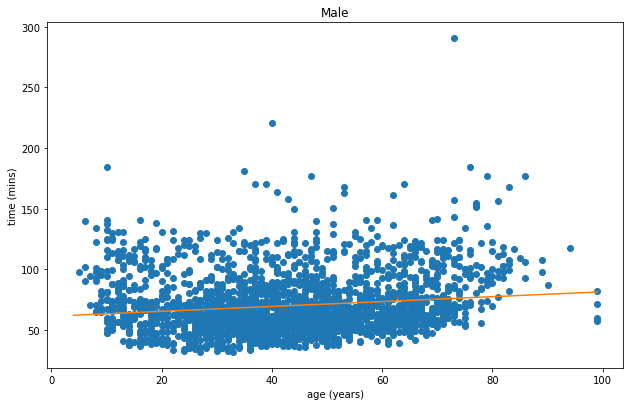

In [25]:
fig = plt.figure(figsize=(10,6))
axes = fig.add_axes([0.1, 0.1, 0.8, 0.8])

axes.plot(maleAges, maleTimes, 'o')
p_optimized, covariance = curve_fit(model_func, maleAges, maleTimes, (0, 50))
x = np.linspace(4, 99, 1000)
plt.plot(x, model_func(x, *p_optimized), '-')
axes.set_xlabel('age (years)')
axes.set_ylabel('time (mins)')
axes.set_title('Male')
fit_m = p_optimized[0]
uncertainty = np.sqrt(covariance[0][0])
R = covariance[0][0] / (np.std(maleAges, ddof=1) * np.std(maleTimes, ddof=1))

fit_b = p_optimized[1]
uncertainty_b = np.sqrt(covariance[1][1])

print('m = {:.3f} +/- {:.3f} mins/year'.format(fit_m, uncertainty))
print('b = {:.3f} +/- {:.3f} mins'.format(fit_b, uncertainty_b))
print('R = {} unitless units'.format(R))

m = 0.333 +/- 0.031 mins/year
b = 65.935 +/- 1.348 mins
R = 2.5719011740083824e-06 unitless units


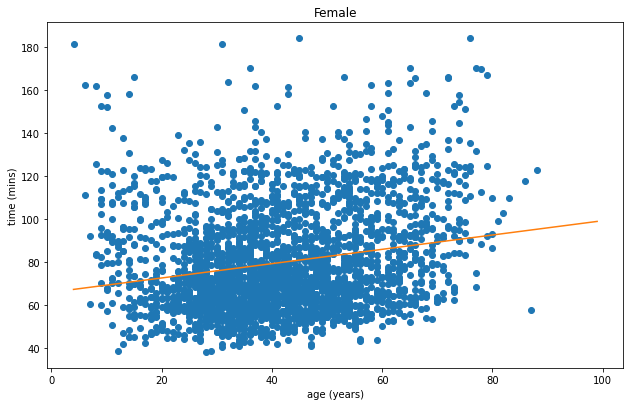

In [27]:
fig = plt.figure(figsize=(10,6))
axes = fig.add_axes([0.1, 0.1, 0.8, 0.8])

axes.plot(femaleAges, femaleTimes, 'o')
p_optimized, covariance = curve_fit(model_func, femaleAges, femaleTimes, (0, 50))
x = np.linspace(4, 99, 1000)
plt.plot(x, model_func(x, *p_optimized), '-')
axes.set_xlabel('age (years)')
axes.set_ylabel('time (mins)')
axes.set_title('Female')
fit_m = p_optimized[0]
uncertainty = np.sqrt(covariance[0][0])
R = covariance[0][0] / (np.std(femaleAges, ddof=1) * np.std(femaleTimes, ddof=1))

fit_b = p_optimized[1]
uncertainty_b = np.sqrt(covariance[1][1])

print('m = {:.3f} +/- {:.3f} mins/year'.format(fit_m, uncertainty))
print('b = {:.3f} +/- {:.3f} mins'.format(fit_b, uncertainty_b))
print('R = {} unitless units'.format(R))